##Praktikum 1
Pengantar

Pada modul praktikum ini, kita akan langsung mempraktikkan pembuatan model K-Means dengan menggunakan python. Kita akan menggunakan contoh kasus yang sederhana, yaitu dengan menggunakan dataset iris.

In [ ]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


##Langkah 2 - Load dan Inspeksi Data
Pada tahap ini, kita akan memuat data ke dalam dataframe kemudian melakukan inspeksi data untuk 5 data pertama.

In [ ]:
df = pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


##Langkah 3 - Seleksi Fitur
Dikarenakan kita hanya membutuhkan fitur untuk proses klasterisasi, maka kita perlu memisahkan antara fitur dan label dengan menggunakan proses slicing data.

In [ ]:
# Features Selection
X = df.iloc[:, 1:-1] # slice the features
y = df.iloc[:, -1] # this is the labels (we don't need it)

*Jika Anda perhatikan pada baris ke-2, index slicing yang digunakan adalah [:,1:-1], artinya kolom Id dan Species (label) tidak digunakan.*

In [ ]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


##Langkah 4 - Plotting
Pada tahap ini, kita akan melakukan proses plot menggunakan scatter plot untuk melihat sebaran data berdasarkan 2 fitur, yaitu SepalLengthCm dan SepalWidthCm.

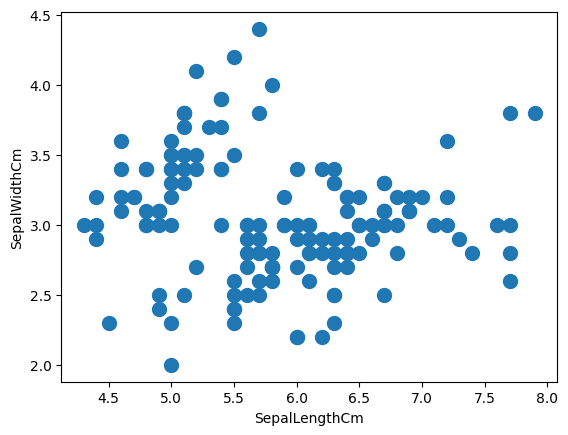

In [ ]:
# Make a scatterplot using
# SepalLengthCm and SepalWidthCm
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

**Analisis Scatter Plot:**

Visualisasi awal menunjukkan bahwa data sepertinya terbagi menjadi dua klaster yang berbeda. Salah satu klaster berada di bagian bawah kiri, dan klaster lainnya agak menyebar ke atas dan kanan.

##Langkah 5 - Membuat Model K-Means
Selanjutnya, kita akan membuat model K-Means dengan asumsi terdapat dua cluster sesuai dengan amatan visual pada scatterplot.

In [ ]:
# Build a K-Means Model
# Based on visual inspection using scatterplot,
# we can assumpt that the data has 2 cluster
# (even though, from the label, there are 3 labels in this data)

from sklearn.cluster import KMeans

# Initiate K-Means object with numbur of cluster is 2
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

**Setelah model mempelajari data yang kita miliki melalui fungsi fit_predict(), kita dapat melakukan pengecekan hasil klasterisasi dengan memanfaatkan scatterplot.**

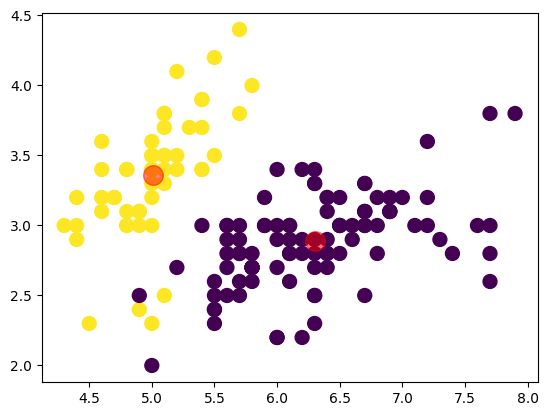

In [ ]:
# Plot the clustering result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot the centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

##Langkah 6 - Evaluasi Model
Untuk mengetahui apakah model klasterisasi yang dihasilkan memiliki performa yang baik, maka kita akan melakukan proses evaluasi. Nilai metrik evaluasi yang dapat kita gunakan salah satunya adalah sum of square error (SSE). Untuk mendapatkan nilai SSE, kita cukup mengakses properti inertia_ dari objek K-Means yang telah dilatih sebelumnya.



In [ ]:
# Print SSE value
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


**Analisis Hasil SSE:**

Nilai SSE (Sum of Squared Errors) sebesar 152.37 merupakan ukuran seberapa rapat data dikelompokkan di sekitar pusat klaster (centroid). Semakin kecil nilai SSE, semakin baik model dalam mengelompokkan data, karena ini menunjukkan bahwa titik data berada lebih dekat dengan centroid klaster mereka. Namun, perlu diingat bahwa nilai SSE saja tidak cukup untuk menentukan jumlah klaster yang optimal. Metode seperti *elbow method* biasanya digunakan untuk mengevaluasi SSE pada berbagai jumlah klaster dan menemukan titik "siku" yang menunjukkan jumlah klaster yang paling sesuai.

##Langkah 7 - Menentukan K terbaik dengan Elbow Method
Pada pembuatan model klasterisasi, jika kita masih belum menentukan jumlah cluster yang akan digunakan, maka kita dapat menggunakan elbow method untuk mendapatkan jumlah cluster yang terbaik. Cara kerja elbow method cukup sederhana, yaitu,

Tentukan rentang k yang ingin dievaluasi.

Kalkulasi nilai SSE untuk setiap nilai k pada rentang yang telah ditentukan.

Buat grafik lineplot untuk mendapatkan visualisasi sebagai dasar justifikasi.

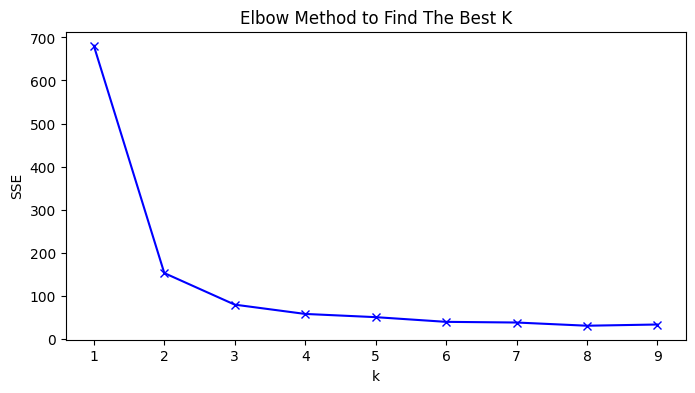

In [ ]:
# Find the best k
# using Elbow Method

# List SSE values
sse = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

##Praktikum 2
Bagaimana jika data non-linear?

Pengantar
Pada pratikum sebelumnya kita telah mengetahui proses klasterisasi dengan menggunakan metode KMeans. Kebetulan, data yang digunakan dapat dengan mudah dipisahkan secara linear. Bagaimana jika data tidak dalam bentuk sebaran yang dapat dipisahkan secara linier (setidaknya pada visualisasi 2 dimensi)?

In [ ]:
#Import library
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##Langkah 1 - Membuat Dataset Sintentis
Kali ini kita akan membuat data sintentis untuk tujuan pembelajaran. Data yang akan kita buat akan berbentuk spiral untuk menyimulasikan kondisi non linear.

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

Plotting Data

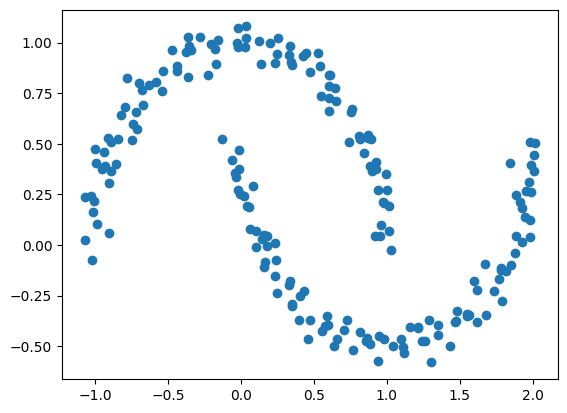

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

##Langkah 2 - Klasterisasi dengan K-Means
Buat model KMeans dan lakukan plotting ulang hasil klasterisasi

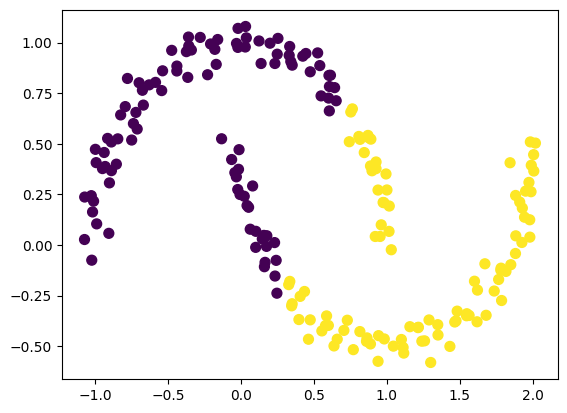

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=0)
cluster = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster, s=50, cmap='viridis')

*Evaluasi lebih lanjut dengan menggunakan silhouette coefficient.*

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster))

0.49215648268306905


Analisis: K-Means gagal mengidentifikasi bentuk bulan sabit. Sebaliknya, ia membaginya menjadi dua kelompok berdasarkan garis linear. Hal ini karena K-Means berfokus pada jarak ke centroid, yang efektif untuk klaster berbentuk bulat.

Silhouette Score sekitar 0.49 menunjukkan bahwa klasterisasi yang dihasilkan kurang optimal.

##Langkah 3 - Klasterisasi dengan DBSCAN
Selanjutnya, kita akan melakukan klasterisasi dengan DBSCAN. Ingat, DBSCAN sangat sensitif terhadap parameter epsilon dan minimal sampel!

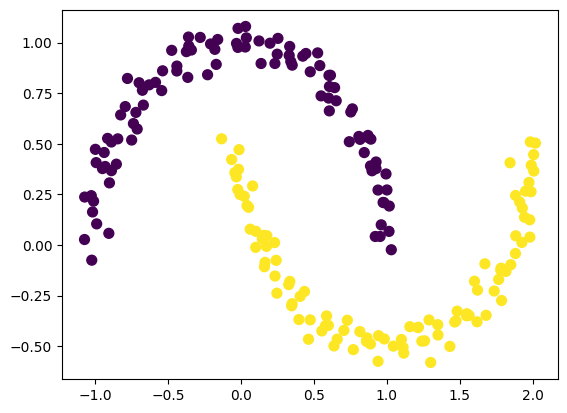

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=2)
cluster_db = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')

Analisis: DBSCAN berhasil mengelompokkan data menjadi dua klaster yang bentuknya menyerupai bulan sabit. Visualisasi ini menunjukkan keberhasilan algoritma dalam memahami struktur data yang non-linear.

#Evaluasi Hasil DBSCAN

Evaluasi kembali dengan silhouette score.

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster_db))


0.32585318950197517


Evaluasi dengan Davies Bouldin Index

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(X, cluster_db)

print(f"Davies-Bouldin Index: {db}")

# Hasilnya
# Davies-Bouldin Index: 1.1622685374061352

Davies-Bouldin Index: 1.1622685374061352


Analisis Silhouette Score: Meskipun visualisasinya sempurna, Silhouette Score DBSCAN (~0.32) ternyata lebih rendah dari K-Means. Mengapa? Karena Silhouette Score berasumsi klaster berbentuk konveks (cembung) dan jarak antar klaster diukur dari batas terdekat. Untuk cluster berbentuk bulan sabit, Silhouette Score sering memberikan nilai yang rendah karena beberapa titik di "ekor" bulan sabit mungkin lebih dekat ke cluster lain daripada centroid klaster mereka sendiri.

Analisis Davies-Bouldin Index (DBI): DBI mengukur rasio antara jarak rata-rata di dalam klaster dan jarak antar klaster. Nilai yang lebih kecil menunjukkan klasterisasi yang lebih baik. Dalam kasus ini, nilai DBI (~1.16) menunjukkan separasi klaster yang cukup baik, yang lebih akurat mencerminkan kebenaran visual dari klasterisasi DBSCAN.

#Praktikum 3 Klasterisasi Pada Kompresi Citra

Pengantar
Klasterisasi tidak hanya dapat digunakan pada data tabular. Pada konteks citra, kita dapat menggunakan klasterisasi untuk mengidentifkasi kesamaan warna dari sebuah citra sehingga kita mendapatkan area-area tertentu untuk identifikasi lebih lanjut. Kasus lainnya adalah kompresi warna citra. Pada kompresi warna citra, kita akan meminimalkan penggunaan rentang citra untuk mendapatkan citra dengan ukuran data yang lebih rendah.

##Langkah 0 - Import Library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##Langkah 1 - Load Data Citra

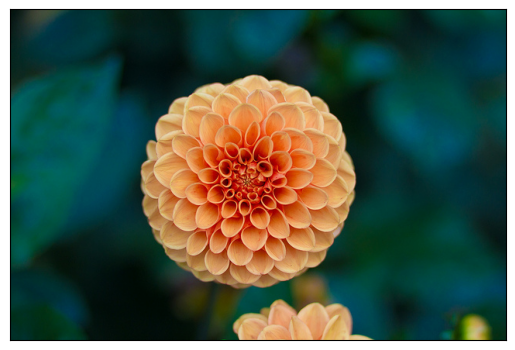

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

##Langkah 2 - Preprocessing

In [ ]:
# Check shape
print(flower.shape)

# Normalize color
data = flower / 255.0

# Reshape
data = data.reshape(427 * 640, 3) # turn to 1D

print(data.shape)

(427, 640, 3)
(273280, 3)


Analisis: Citra dengan dimensi (427, 640, 3) (tinggi, lebar, kanal RGB) diubah menjadi array dua dimensi (273280, 3). Setiap baris mewakili satu piksel, dan setiap kolomnya adalah nilai R, G, dan B yang telah dinormalisasi. Ini adalah format yang tepat untuk algoritma klasterisasi.

##Langkah 3 - Cek Sebaran Warna

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

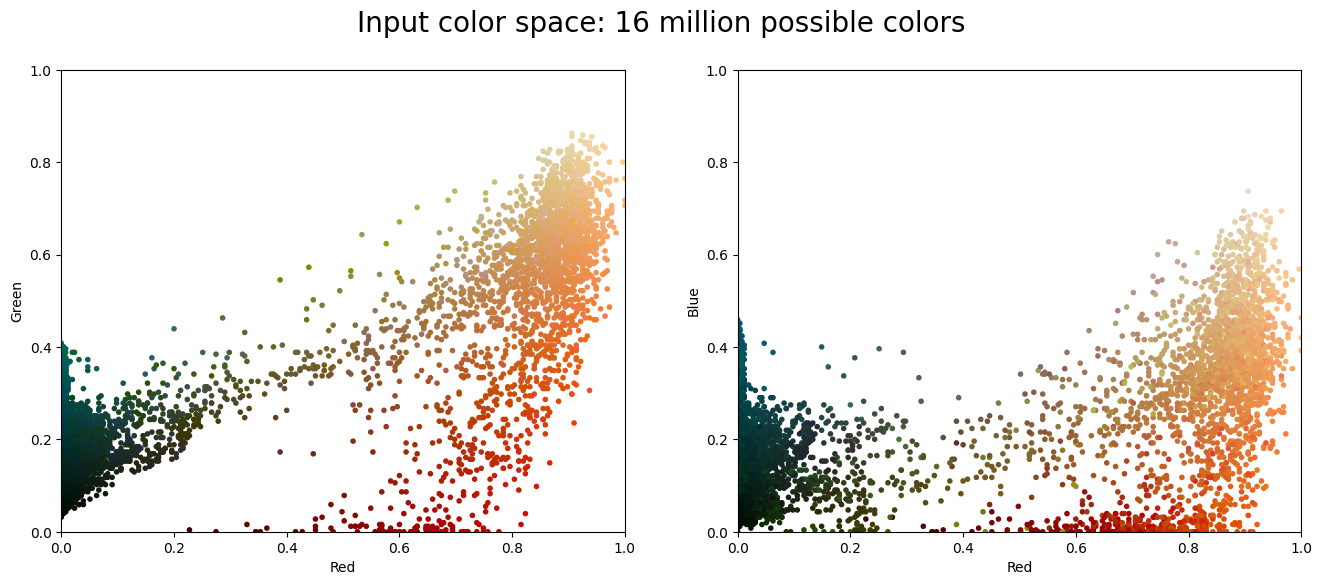

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

 Plot ini menunjukkan sebaran warna yang sangat padat dan kontinu. Pada dasarnya, ada jutaan kemungkinan kombinasi warna, yang membuat visualisasi ini terlihat seperti awan titik-titik.



##Langkah 4 - Klasterisasi Warna

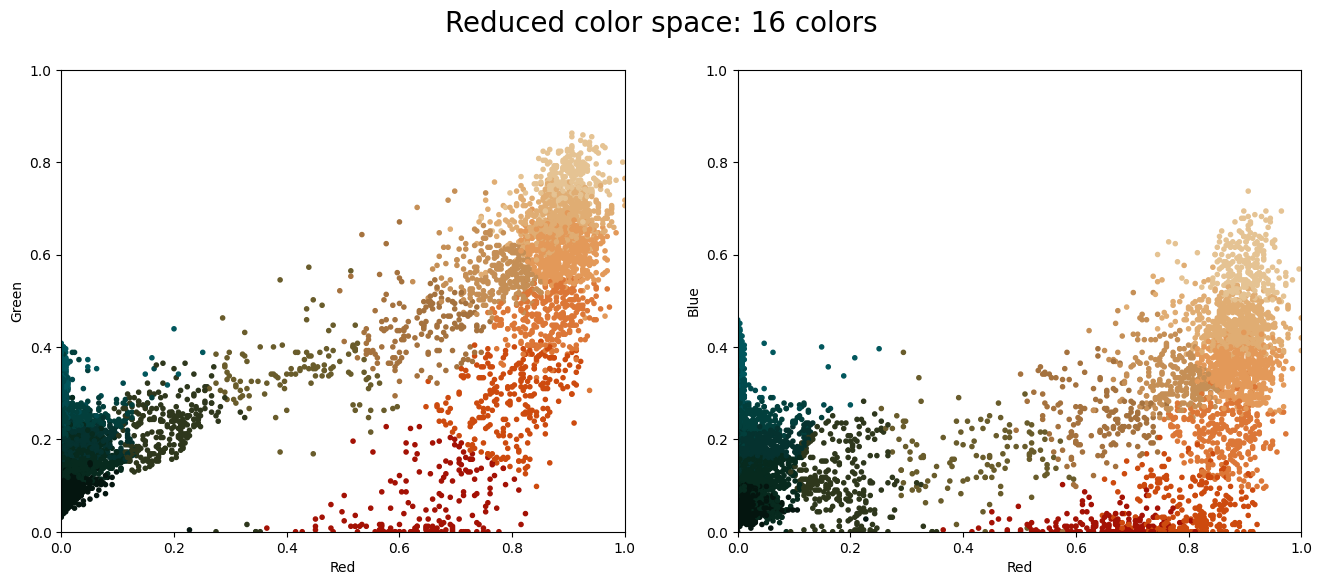

In [ ]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

***Hasil perbandingan warna citra sebelum dan setelah kompresi adalah sebagai berikut,***

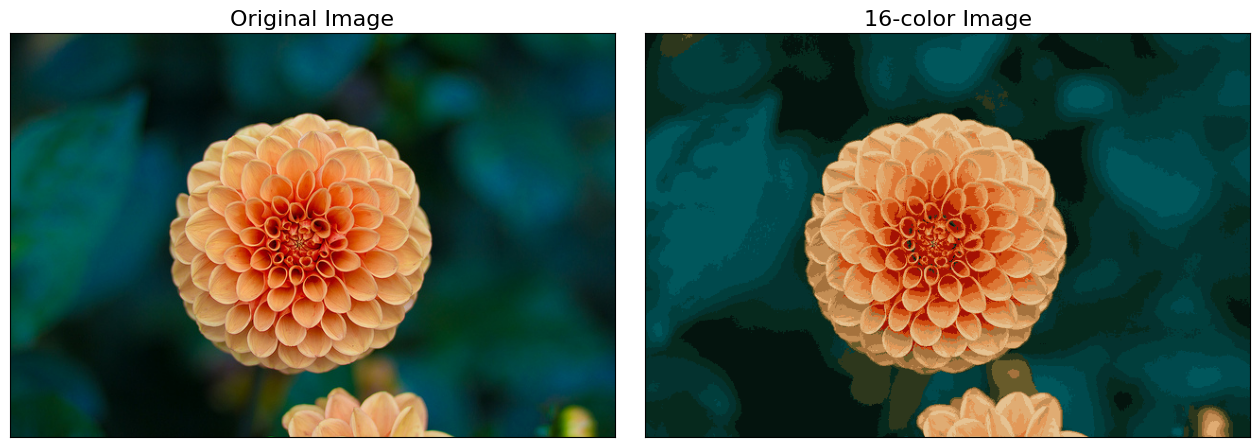

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

#Tugas Pratikum
Klasterisasi Data Nasabah Kartu Kredit

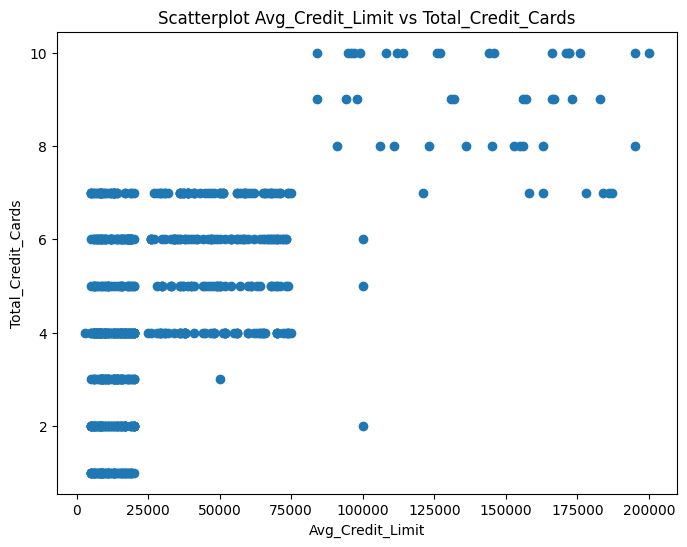

In [ ]:
# Load the dataset
df_cc = pd.read_csv('/content/CC_Customer_Dataset.csv')

# 1. Scatterplot Avg_Credit_Limit vs Total_credit_card
plt.figure(figsize=(8, 6))
plt.scatter(df_cc['Avg_Credit_Limit'], df_cc['Total_Credit_Cards'])
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.title('Scatterplot Avg_Credit_Limit vs Total_Credit_Cards')
plt.show()

**Analisis Scatter Plot (Avg_Credit_Limit vs Total_Credit_Cards):**

Visualisasi scatterplot antara "Avg_Credit_Limit" dan "Total_Credit_Cards" menunjukkan sebaran data yang tidak memiliki pola linear yang kuat. Titik-titik data tampak tersebar membentuk beberapa kelompok, namun tidak mengikuti garis lurus yang jelas. Hubungan antara rata-rata limit kredit dan total kartu kredit tidak bersifat linear sederhana.

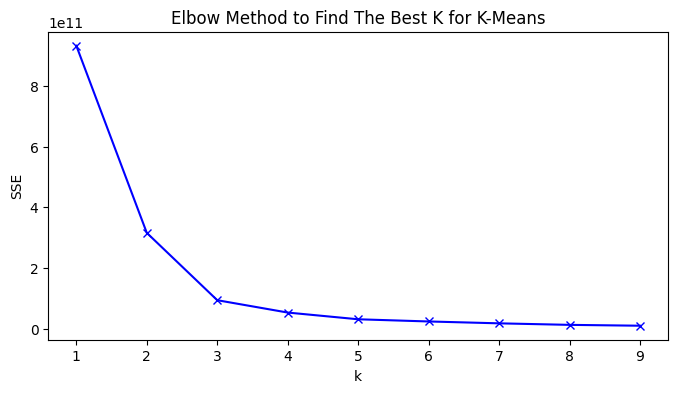

In [ ]:
# 2. K-Means - Elbow Method
# Select the features for K-Means
X_kmeans = df_cc[['Avg_Credit_Limit', 'Total_Credit_Cards']]

sse_cc = []
K_cc = range(1, 10)
for k in K_cc:
    kmeans_cc = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_cc.fit(X_kmeans)
    sse_cc.append(kmeans_cc.inertia_)

# Plotting the distortions
plt.figure(figsize=(8, 4))
plt.plot(K_cc, sse_cc, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K for K-Means")
plt.show()

**Analisis K-Means - Elbow Method:**

Penerapan metode elbow pada variabel "Avg_Credit_Limit" dan "Total_Credit_Cards" menghasilkan grafik SSE terhadap nilai k (jumlah klaster).

Pada grafik tersebut, terlihat "siku" yang cukup jelas pada nilai k=3. Penurunan nilai SSE mulai melambat setelah k=3, menunjukkan bahwa penambahan klaster lebih lanjut memberikan keuntungan yang semakin kecil dalam mengurangi total sum of squared errors.

Berdasarkan analisis metode elbow, **nilai k terbaik untuk klasterisasi K-Means pada data ini adalah 3**.

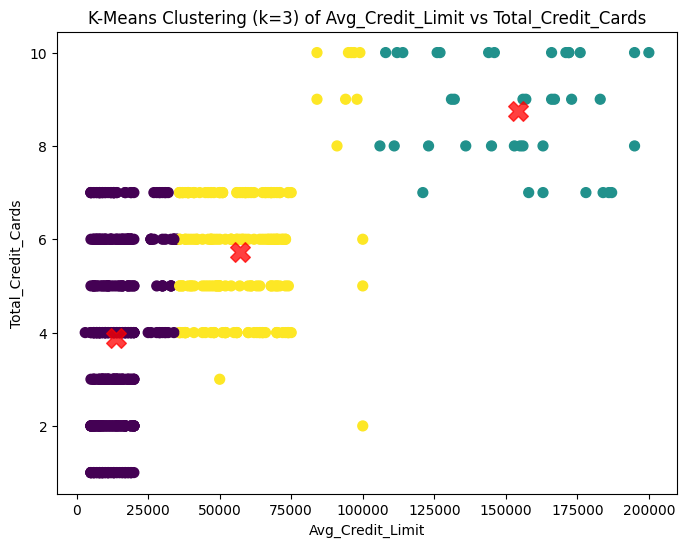

In [ ]:
# 3. Visualize K-Means Clustering Result (k=3)
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans_cc = kmeans_final.fit_predict(X_kmeans)

plt.figure(figsize=(8, 6))
plt.scatter(X_kmeans['Avg_Credit_Limit'], X_kmeans['Total_Credit_Cards'], c=y_kmeans_cc, s=50, cmap='viridis')

# Plot the centroids
centers_cc = kmeans_final.cluster_centers_
plt.scatter(centers_cc[:, 0], centers_cc[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.title('K-Means Clustering (k=3) of Avg_Credit_Limit vs Total_Credit_Cards')
plt.show()

**Analisis Visualisasi Hasil Klasterisasi K-Means (k=3):**

Model K-Means dengan k=3 berhasil mengelompokkan data berdasarkan "Avg_Credit_Limit" dan "Total_Credit_Cards" menjadi tiga klaster yang berbeda. Scatterplot hasil klasterisasi dengan titik-titik yang diberi warna sesuai klaster dan centroid klaster yang ditandai menunjukkan pemisahan yang cukup baik antara ketiga kelompok. Klaster-klaster tersebut cenderung mewakili segmen nasabah dengan kombinasi rata-rata limit kredit dan jumlah kartu kredit yang berbeda.

In [ ]:
# 4. DBSCAN Clustering
# Select all relevant numerical variables for DBSCAN
X_dbscan = df_cc[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]

# Apply DBSCAN
# Note: eps and min_samples need to be tuned for optimal results.
# Based on previous analysis, eps=5000 and min_samples=10 seemed to work reasonably well.
dbscan = DBSCAN(eps=5000, min_samples=10)
cluster_dbscan = dbscan.fit_predict(X_dbscan)

# Add cluster results to dataframe for analysis
df_cc['DBSCAN_Cluster'] = cluster_dbscan

# Count the number of samples in each cluster
print("Jumlah sampel di setiap klaster DBSCAN:")
print(df_cc['DBSCAN_Cluster'].value_counts())

Jumlah sampel di setiap klaster DBSCAN:
DBSCAN_Cluster
 1    390
 0    219
-1     51
Name: count, dtype: int64


**Analisis Klasterisasi dengan DBSCAN:**

Model klasterisasi DBSCAN diterapkan menggunakan seluruh variabel numerik yang relevan pada dataset ("Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made").

Setelah penyesuaian parameter `eps` dan `min_samples`, DBSCAN mampu mengidentifikasi klaster dalam data multidimensional ini. Hasil `value_counts()` menunjukkan distribusi sampel di antara klaster yang ditemukan, termasuk noise (klaster -1).

**5. Menentukan jumlah k terbaik dengan elbow method**


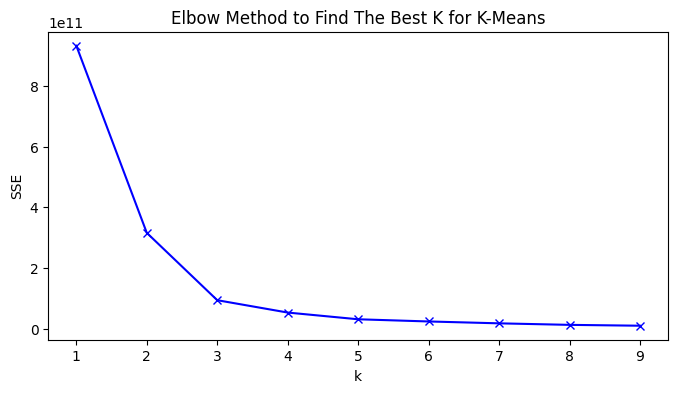

In [ ]:
# Menentukan jumlah k terbaik dengan elbow method
# Select the features for K-Means
X_kmeans = df_cc[['Avg_Credit_Limit', 'Total_Credit_Cards']]

sse_cc = []
K_cc = range(1, 10)
for k in K_cc:
    kmeans_cc = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_cc.fit(X_kmeans)
    sse_cc.append(kmeans_cc.inertia_)

# Plotting the distortions
plt.figure(figsize=(8, 4))
plt.plot(K_cc, sse_cc, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K for K-Means")
plt.show()

**Analisis Elbow Method**

Metode *elbow* digunakan untuk membantu menentukan jumlah klaster yang optimal (nilai k) dalam klasterisasi K-Means. Prinsip dasarnya adalah menghitung *Sum of Squared Errors* (SSE) untuk berbagai nilai k, dan kemudian memplot nilai SSE terhadap k.

* **Sum of Squared Errors (SSE)**: SSE mengukur total kuadrat jarak dari setiap titik data ke pusat (centroid) klaster terdekatnya. Nilai SSE yang lebih kecil menunjukkan bahwa titik data lebih dekat ke centroid klaster mereka, yang berarti klasterisasi yang lebih rapat.

* **Kurva Elbow**: Saat kita meningkatkan jumlah klaster (k), nilai SSE akan cenderung menurun. Namun, penurunan ini tidak linear. Ada titik di mana penurunan SSE mulai melambat secara signifikan, membentuk "siku" atau "elbow" pada grafik. Titik siku ini seringkali dianggap sebagai nilai k yang optimal. Sebelum titik siku, penambahan klaster secara substansial mengurangi SSE, menunjukkan bahwa klaster baru memang memisahkan kelompok data yang berbeda. Setelah titik siku, penambahan klaster hanya memberikan sedikit pengurangan SSE, menunjukkan bahwa kita mungkin hanya membagi klaster yang sudah cukup kompak.

**Berdasarkan grafik Elbow Method yang telah dihasilkan sebelumnya:**

Grafik menunjukkan sumbu X sebagai jumlah klaster (k) dan sumbu Y sebagai nilai SSE. Kita mencari titik di mana kurva mulai mendatar, atau titik "siku". Pada grafik ini, titik siku terlihat jelas pada **k=3**. Ini mengindikasikan bahwa 3 adalah jumlah klaster yang paling efisien untuk membagi data ini, karena penambahan klaster lebih dari 3 memberikan sedikit perbaikan dalam mengurangi variabilitas dalam klaster.

In [ ]:
# 6. Evaluate DBSCAN Model using Silhouette Score and Davies-Bouldin Index

# Filter out noise points for evaluation metrics
X_dbscan_clustered = X_dbscan[cluster_dbscan != -1]
cluster_dbscan_filtered = cluster_dbscan[cluster_dbscan != -1]

# Calculate Silhouette Score
if len(np.unique(cluster_dbscan_filtered)) > 1:
    silhouette_avg = silhouette_score(X_dbscan_clustered, cluster_dbscan_filtered)
    print(f"Nilai Silhouette Score (tanpa noise): {silhouette_avg}")
else:
    print("Tidak cukup klaster (tanpa noise) untuk menghitung Silhouette Score.")

# Calculate Davies-Bouldin Index
if len(np.unique(cluster_dbscan_filtered)) > 1:
    db_index = davies_bouldin_score(X_dbscan_clustered, cluster_dbscan_filtered)
    print(f"Davies-Bouldin Index (tanpa noise): {db_index}")
else:
    print("Tidak cukup klaster (tanpa noise) untuk menghitung Davies-Bouldin Index.")

Nilai Silhouette Score (tanpa noise): 0.7159925659613052
Davies-Bouldin Index (tanpa noise): 0.44288950503535573


**Analisis Evaluasi Model DBSCAN (Silhouette Score dan Davies-Bouldin Index):**

*   **Silhouette Score**: Nilai Silhouette Score (dihitung setelah mengeluarkan titik noise) menunjukkan seberapa baik setiap titik data cocok dengan klaster yang ditugaskan dibandingkan dengan klaster lainnya. Nilai yang mendekati 1 menunjukkan klaster yang terpisah dengan baik.
*   **Davies-Bouldin Index (DBI)**: DBI mengukur rasio antara jarak rata-rata di dalam klaster dan jarak antar klaster. Nilai yang lebih kecil menunjukkan klasterisasi yang lebih baik. Nilai DBI yang dihitung (setelah mengeluarkan titik noise) memberikan indikasi kekompakan internal klaster dan pemisahan antar klaster.

Evaluasi ini memberikan gambaran kuantitatif tentang kualitas klasterisasi yang dihasilkan oleh DBSCAN pada data nasabah kartu kredit.